<a href="https://colab.research.google.com/github/vutl/AIO-Exercises/blob/feature%2FKNN-KMean/Module%203/KNN_KMean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu 3:

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris_X, iris_y = datasets.load_iris(return_X_y=True)

# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    iris_X,
    iris_y,
    test_size=0.2,
    random_state=42
)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Predict and Evaluate test set
y_pred = knn_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

1.0


Câu 5:

In [3]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Paragraph A:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Paragraph B:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paragraph C:
# Build KNN model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)

# Paragraph D:
# Split train:test = 8:2
X_train, X_test, y_train, y_test = train_test_split(
    diabetes_X,
    diabetes_y,
    test_size=0.2,
    random_state=42
)

Câu 7:

In [ ]:
# Import library
!pip install -q datasets
import numpy as np
from datasets import load_dataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import CountVectorizer

# Load IMDB dataset
imdb = load_dataset("imdb")
imdb_train, imdb_test = imdb['train'], imdb['test']

# Convert text to vector using BoW
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(imdb_train['text']).toarray()
X_test = vectorizer.transform(imdb_test['text']).toarray()

y_train = np.array(imdb_train['label'])
y_test = np.array(imdb_test['label'])

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=1, algorithm='ball_tree')
knn_classifier.fit(X_train, y_train)

# predict test set and evaluate
y_pred = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred)

K-MEAN

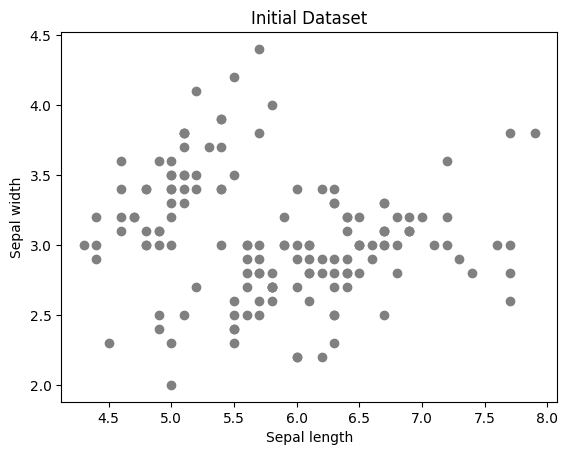

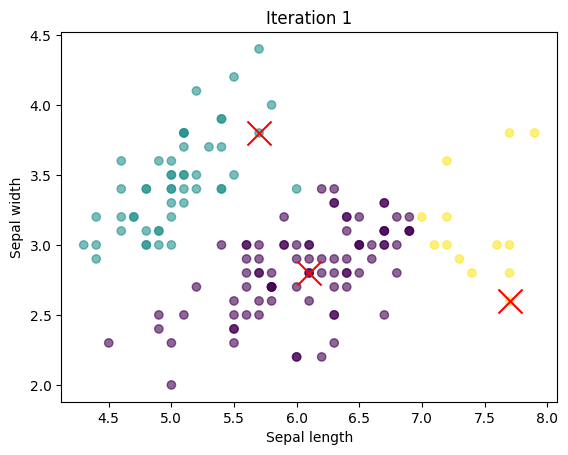

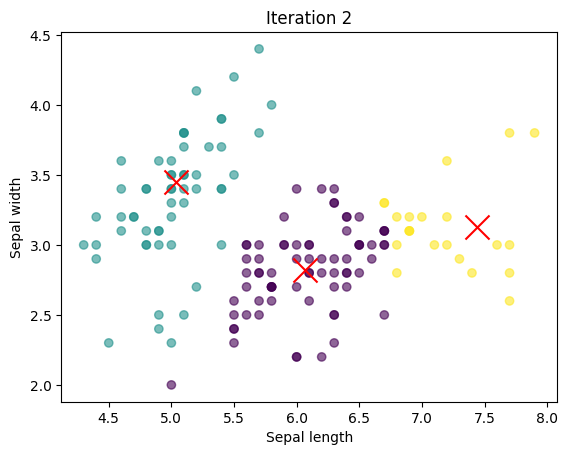

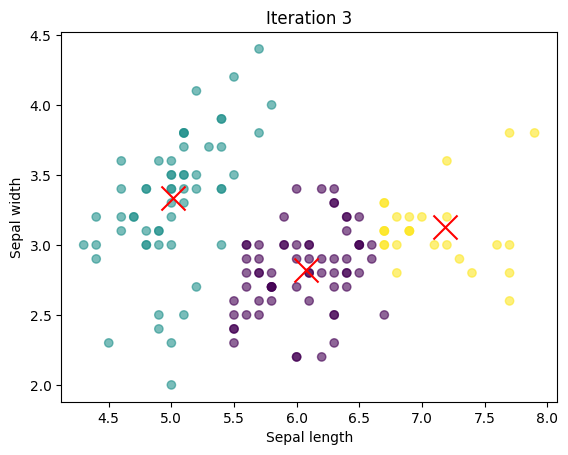

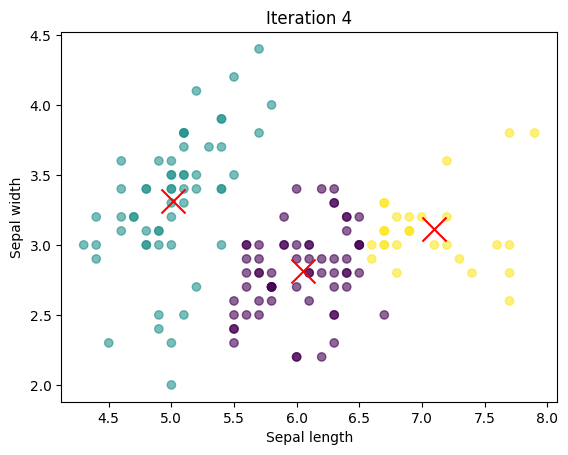

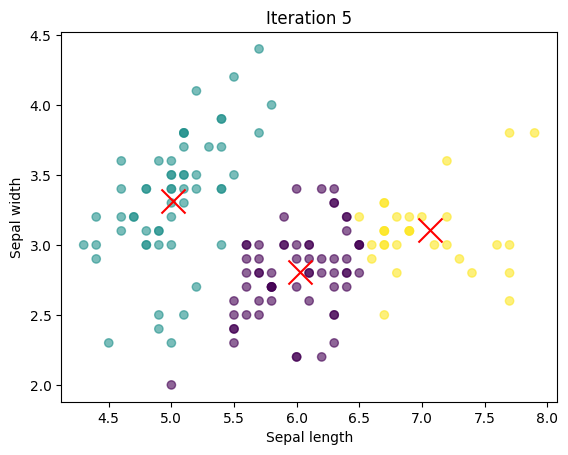

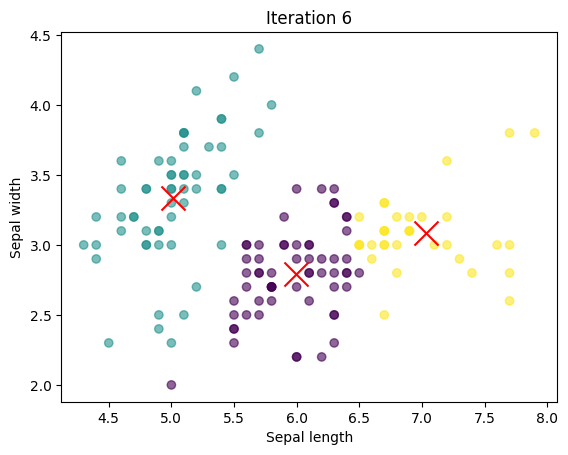

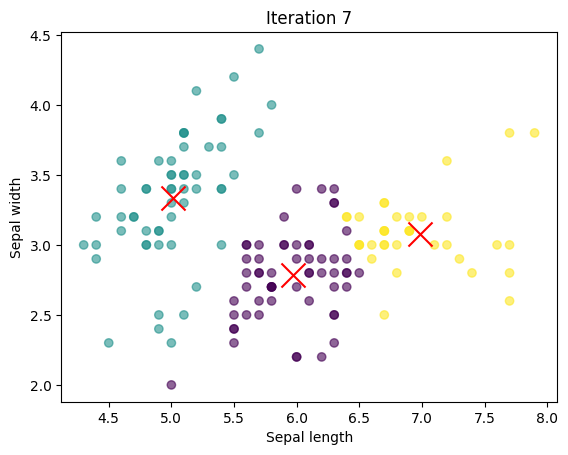

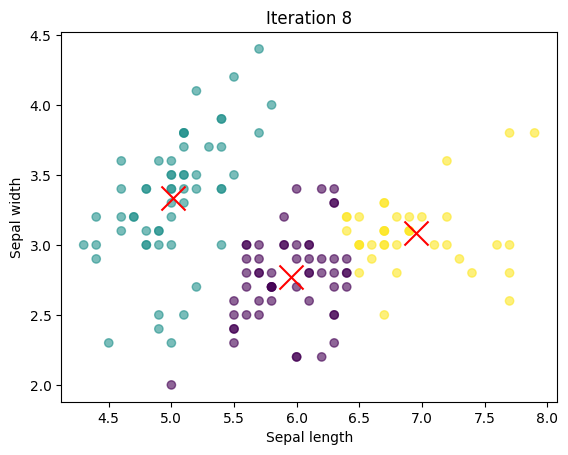

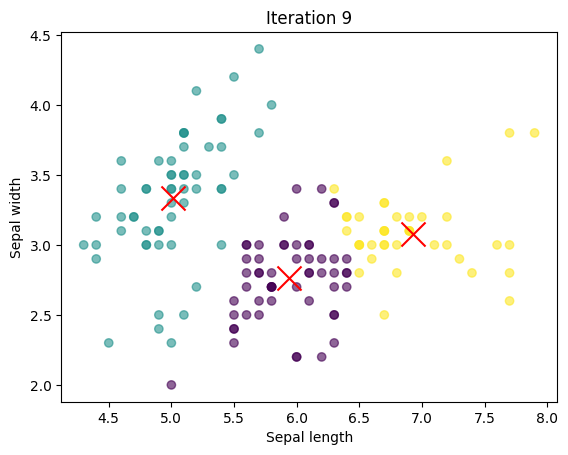

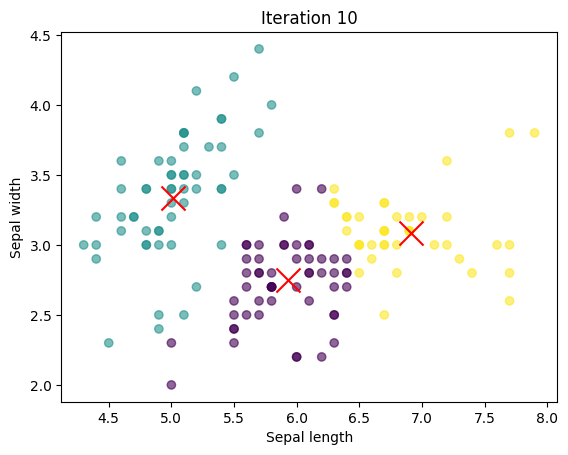

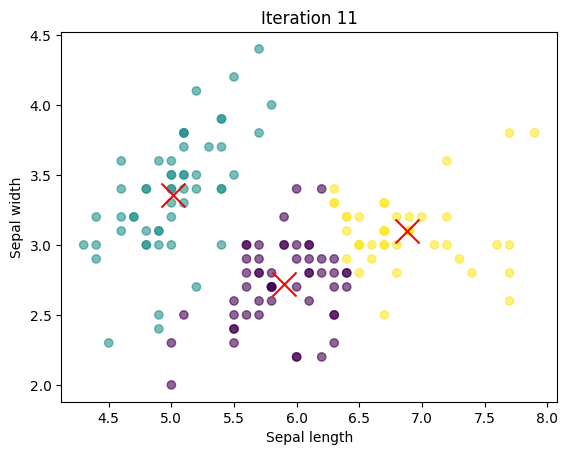

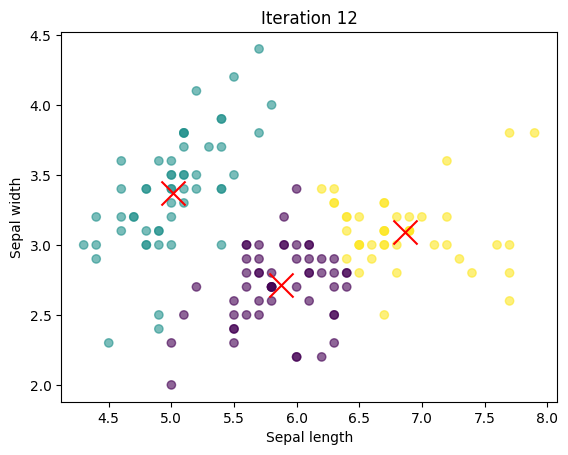

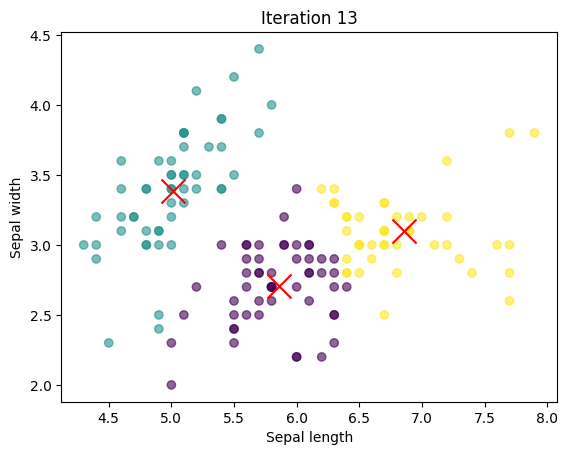

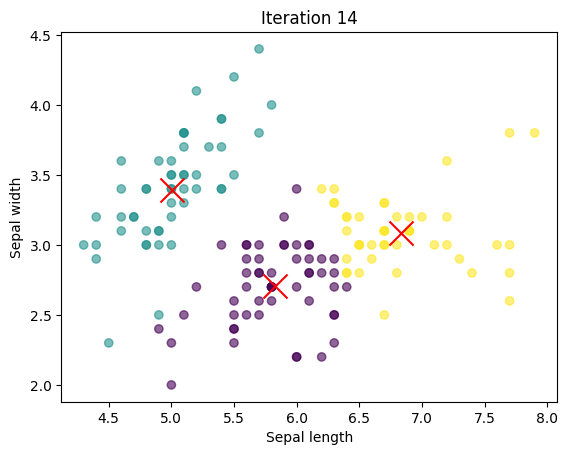

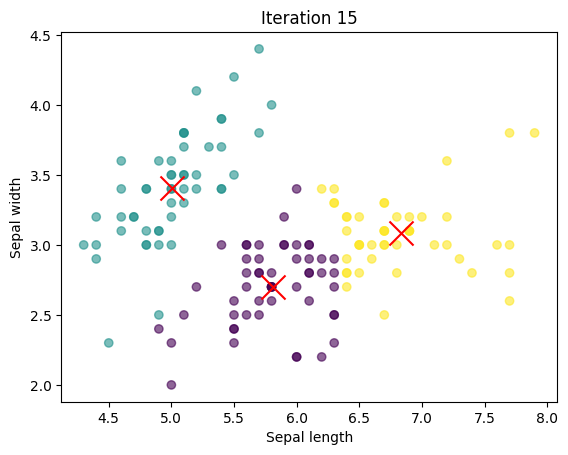

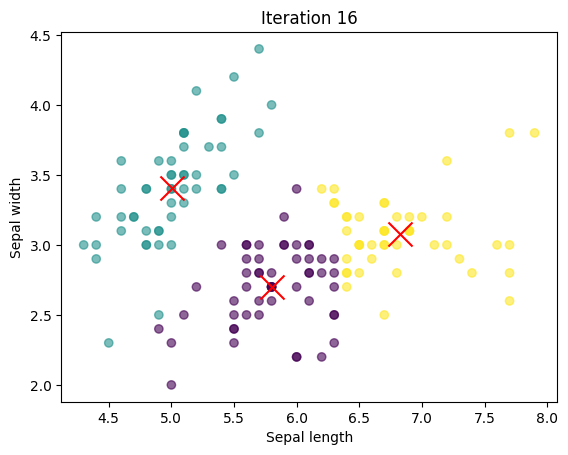

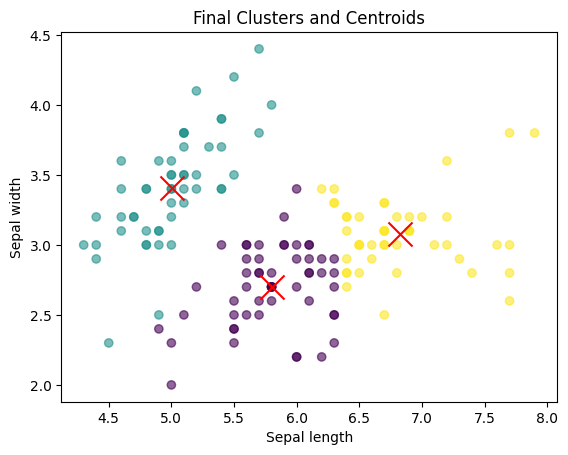

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_dataset = load_iris()
data = iris_dataset.data[:, :2]  # Chỉ lấy 2 features đầu

# Plot initial dataset
plt.scatter(data[:, 0], data[:, 1], c='gray')
plt.title("Initial Dataset")
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.show()

class KMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
        self.centroids = None
        self.clusters = None

    def initialize_centroids(self, data):
        np.random.seed(42)
        self.centroids = data[np.random.choice(data.shape[0], self.k, replace=False)]

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum(np.power(x1 - x2, 2)))

    def assign_clusters(self, data):
        distances = np.array([[self.euclidean_distance(x, centroid) for centroid in self.centroids] for x in data])
        return np.argmin(distances, axis=1)

    def update_centroids(self, data):
        return np.array([data[self.clusters == i].mean(axis=0) for i in range(self.k)])

    def fit(self, data):
        self.initialize_centroids(data)

        for i in range(self.max_iters):
            self.clusters = self.assign_clusters(data)
            self.plot_clusters(data, i)

            new_centroids = self.update_centroids(data)
            if np.all(self.centroids == new_centroids):
                break
            self.centroids = new_centroids

        self.plot_final_clusters(data)

    def plot_clusters(self, data, iteration):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title(f"Iteration {iteration + 1}")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

    def plot_final_clusters(self, data):
        plt.scatter(data[:, 0], data[:, 1], c=self.clusters, cmap='viridis', marker='o', alpha=0.6)
        plt.scatter(self.centroids[:, 0], self.centroids[:, 1], s=300, c='red', marker='x')
        plt.title("Final Clusters and Centroids")
        plt.xlabel('Sepal length')
        plt.ylabel('Sepal width')
        plt.show()

# Khởi tạo đối tượng KMeans và thực hiện phân cụm
kmeans = KMeans(k=3)
kmeans.fit(data)

In [5]:
import numpy as np

# Tọa độ của điểm và centroid
point = np.array([2.0, 3.0, 1.5])
centroid = np.array([8.0, 8.0, 7.5])

# Tính khoảng cách Euclid
distance = np.sqrt(np.sum((point - centroid)**2))
print("Khoảng cách Euclid:", distance)

Khoảng cách Euclid: 9.848857801796104


In [6]:
# Tọa độ của điểm dữ liệu cần phân cụm
point_to_classify = np.array([3.0, 3.5, 2.0])

# Tọa độ của các centroids
centroid1 = np.array([2.0, 3.0, 1.5])
centroid2 = np.array([8.0, 8.0, 7.5])

# Tính khoảng cách đến các centroid
distance_to_centroid1 = np.sqrt(np.sum((point_to_classify - centroid1)**2))
distance_to_centroid2 = np.sqrt(np.sum((point_to_classify - centroid2)**2))

print("Khoảng cách đến centroid 1:", distance_to_centroid1)
print("Khoảng cách đến centroid 2:", distance_to_centroid2)

# Xác định cụm
if distance_to_centroid1 < distance_to_centroid2:
    print("Điểm dữ liệu thuộc cụm 1")
else:
    print("Điểm dữ liệu thuộc cụm 2")

Khoảng cách đến centroid 1: 1.224744871391589
Khoảng cách đến centroid 2: 8.689073598491383
Điểm dữ liệu thuộc cụm 1


In [7]:
# Các điểm thuộc cụm 1 (giả sử là các điểm đầu tiên từ bảng dữ liệu)
cluster1_points = np.array([[2.0, 3.0, 1.5], [3.0, 3.5, 2.0]])

# Tính centroid mới
new_centroid1 = np.mean(cluster1_points, axis=0)
print("Centroid mới cho cụm 1:", new_centroid1)

Centroid mới cho cụm 1: [2.5  3.25 1.75]


In [8]:
from sklearn.cluster import KMeans

# Bộ dữ liệu
data = np.array([
    [2.0, 3.0, 1.5],
    [3.0, 3.5, 2.0],
    [3.5, 3.0, 2.5],
    [8.0, 8.0, 7.5],
    [8.5, 8.5, 8.0],
    [9.0, 8.0, 8.5],
    [1.0, 2.0, 1.0],
    [1.5, 2.5, 1.5]
])

# Áp dụng K-Means với k=3
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)

# Các centroid
centroids = kmeans.cluster_centers_
print("Các centroid mới là:", centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Các centroid mới là: [[3.25       3.25       2.25      ]
 [8.5        8.16666667 8.        ]
 [1.5        2.5        1.33333333]]
